In [42]:
import os
import sys
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "..\\Scripts")

from network_rrdbnet import RRDBNet as net


In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = os.path.join("..", "Scripts", "Models", "BSRGANx2.pth")

In [44]:
model = net(in_nc=3, out_nc=3, nf=64, nb=23, gc=32, sf=2).to(device)

[3, 3, 64, 23, 32, 2]


In [45]:
model.load_state_dict(torch.load(model_path), strict=True)
model.eval()
for k, v in model.named_parameters():
    v.requires_grad = False
model = model.to(device)
torch.cuda.empty_cache()

C:\Users\tomma\AppData\Local\Temp\ipykernel_13380\2425050881.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), strict=True)


In [46]:
path = os.path.join('..', 'Dataset', 'val_set_degraded', "val_000247.jpg")

In [47]:
path_real = os.path.join('..', 'Dataset', 'val_set', "val_000247.jpg")
real_img = cv2.imread(path_real)

In [48]:
def uint2tensor4(img):
    if img.ndim == 2:
        img = np.expand_dims(img, axis=2)
    return torch.from_numpy(np.ascontiguousarray(img)).permute(2, 0, 1).float().div(255.).unsqueeze(0)

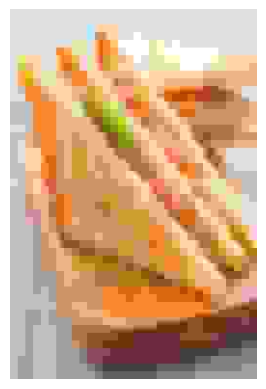

In [49]:
# Aprire l'immagine di input
image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()

In [50]:
input_image = uint2tensor4(image)
print(input_image.shape)

torch.Size([1, 3, 384, 256])


In [51]:
with torch.no_grad():
    output_image = model(input_image.to(device)).data.squeeze().float().cpu().clamp_(0, 1).numpy()

print(output_image.shape)

(3, 768, 512)


In [52]:
output_image = np.transpose(output_image, (1, 2, 0))

In [53]:
input_image = input_image.squeeze().permute(1, 2, 0).numpy()

(-0.5, 255.5, 383.5, -0.5)

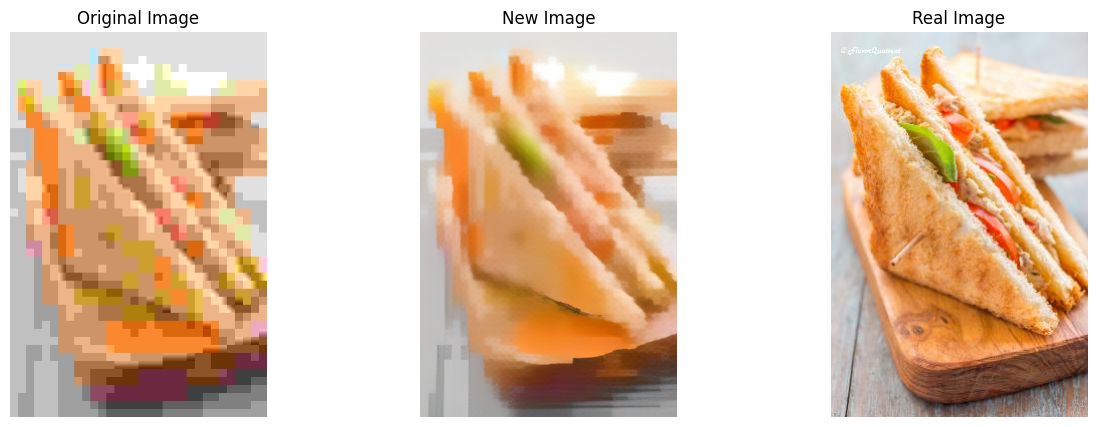

In [54]:
# Creazione della figura con subplot
plt.figure(figsize=(15, 5))

# Subplot per l'immagine degradata
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title(f"Original Image")
plt.axis("off")

# Subplot per l'immagine originale
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f"New Image")
plt.axis("off")

# Subplot per la differenza tra le due immagini
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
plt.title(f"Real Image")
plt.axis("off")